# Construct dataset

In [2]:
from module.for_dataset.create_dataset import create_dataset
from module.for_model.training import construct_and_train_model
import matplotlib.pyplot as plt
from module.for_dataset.normalization import normalization

In [3]:
X_train, Y_train, X_test, Y_test  = create_dataset(0,20000, "xor")

# 原本數值介於 +-2 之間而已，所以就不用 normalize 了
# 跑了一遍之後發現好像還是需要限縮到 0~1

### Preprocess

#### 觀察資料
發現 X 值
1. 有正有負
2. 明顯以 0.5 為中心，分隔開來的兩堆資料 (Y也是)

In [9]:
X_train.shape

(16000, 2)

(array([[2345., 2244., 2259., 1098.,    0.,    0., 1162., 2278., 2316.,
         2298.],
        [2301., 2243., 2277., 1202.,    0.,    0., 1155., 2268., 2238.,
         2316.]]),
 array([-0.49988349, -0.29989797, -0.09991246,  0.10007306,  0.30005858,
         0.5000441 ,  0.70002962,  0.90001513,  1.10000065,  1.29998617,
         1.49997169]),
 <a list of 2 BarContainer objects>)

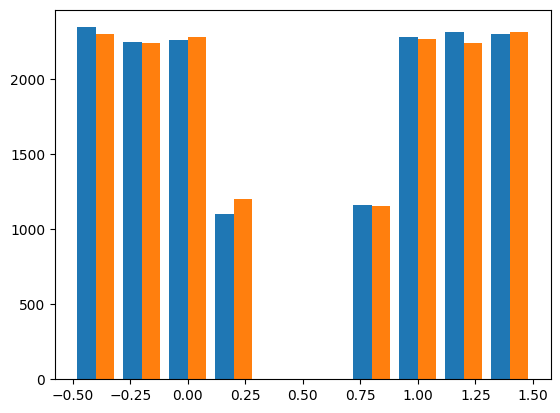

In [10]:
plt.hist(X_train)

(array([[565., 608., 540., 289.,   0.,   0., 272., 580., 554., 592.],
        [561., 587., 578., 278.,   0.,   0., 275., 563., 584., 574.]]),
 array([-0.49953505, -0.29959654, -0.09965803,  0.10028048,  0.30021899,
         0.50015749,  0.700096  ,  0.90003451,  1.09997302,  1.29991153,
         1.49985003]),
 <a list of 2 BarContainer objects>)

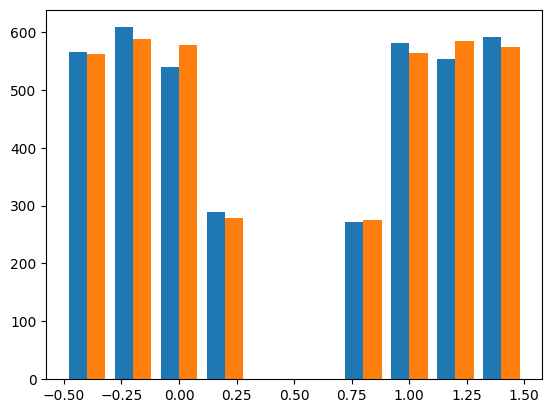

In [11]:
plt.hist(X_test)

(array([7936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

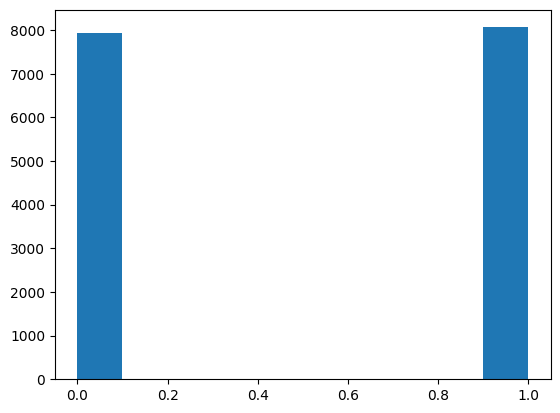

In [12]:
plt.hist(Y_train)

(array([1929.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2071.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

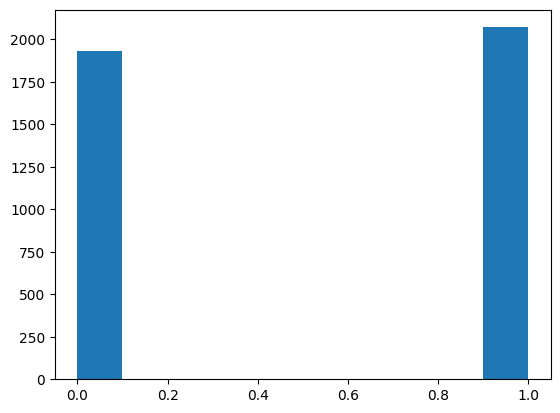

In [13]:
plt.hist(Y_test)

#### 正規化

In [8]:
# reshape for the model output
# 因為計算 backprobagetion 時矩陣相乘的問題，所以需轉換
# 但 shape = (1,) 者無法透過 .T 轉置，所以必須 reshape
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

In [ ]:
normalizer = normalization(X_train-5)
X_train_n = normalizer.normalize(X_train-5)
Y_train_n = normalizer.normalize(Y_train-5)
X_test_n = normalizer.normalize(X_test-5)
Y_test_n = normalizer.normalize(Y_test-5)

## Train and Record

In [6]:



folder_test_name = "2024_0605_1942"
n = 2

folder_node = f"node_{n:02d}"
path_folder = f"checkpoints\\{folder_test_name}\\{folder_node}"

loss_n = []
param_n = []
# 用 30 個不同的 randam seed 訓練 30 個不同的模型
for layer_initializer in range(30):
    print(f"\tlayer_initializer = {layer_initializer}")    

    ttl_loss, ttl_param = \
        construct_and_train_model(
            n = n,
            layer_initializer = layer_initializer,
            data = data,
            epoch_cycle = 10
        )
    loss_n.append(ttl_loss)
    param_n.append(ttl_param)

	layer_initializer = 0


NameError: name 'data' is not defined